In [ ]:
# Install gdown
!pip install gdown

# Import necessary libraries
import gdown
import zipfile
import os

# URL of the dataset on Google Drive
url = 'https://drive.google.com/uc?id=1hIzdZURDq4YdS5MjQ9d7lgZzTwqQisA2'

# Download the dataset
dataset_zip_path = '/content/UCF_Crimes.zip'
gdown.download(url, dataset_zip_path, quiet=False)

# Unzip the dataset
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/UCF_Crimes')

# List the extracted files
for root, dirs, files in os.walk('/content/UCF_Crimes'):
    for name in files:
        print(os.path.join(root, name))


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1hIzdZURDq4YdS5MjQ9d7lgZzTwqQisA2

but Gdown can't. Please check connections and permissions.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


# **Install Kaggle API:**

In [ ]:
!pip install kaggle

In [ ]:
# Upload kaggle.json file from your computer
#from google.colab import files
#files.upload()

# **Set up Kaggle API Key:**

In [ ]:
# Make a directory for Kaggle and move the uploaded token there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Download the Kaggle Dataset:**

In [ ]:
!kaggle datasets download -d odins0n/ucf-crime-dataset --unzip



Dataset URL: https://www.kaggle.com/datasets/odins0n/ucf-crime-dataset
License(s): CC0-1.0
100% 11.0G/11.0G [08:47<00:00, 31.1MB/s]
100% 11.0G/11.0G [08:47<00:00, 22.4MB/s]


In [ ]:
!kaggle datasets download -d vasylcf/anomaly --unzip

Dataset URL: https://www.kaggle.com/datasets/vasylcf/anomaly
License(s): DbCL-1.0
100% 15.2G/15.2G [09:22<00:00, 23.7MB/s]
100% 15.2G/15.2G [09:22<00:00, 29.0MB/s]


In [ ]:
import glob

import pandas as pd

labels_file = "/kaggle/input/ucf-crime-labels/Temporal_Anomaly_Annotation_for_Testing_Videos.txt"
labels = pd.read_csv(labels_file, header=None, sep='\s+')

full_paths = []

for filename in labels[0]:
    pat = f"/kaggle/input/real-time-anomaly-detection-in-cctv-surveillance/data/*/{filename}"
    full_paths.append(glob.glob(pat)[0])

labels[0] = full_paths

ValueError: could not convert string to float: 'anomaly_detection/anomaly/Videos/Shoplifting/Shoplifting036_x264.mp4 30 3'

In [ ]:
import tensorflow as tf
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data Preparation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Define source and destination directories
train_source_dir = "/content/Train"
test_source_dir = "/content/Test"
train_sep_dir = "train_sep"
test_sep_dir = "test_sep"

# Define subfolders to be copied, I am using right now shoplifting
subfolders_to_copy = ['Shoplifting']

# Create 'train_sep' and 'test_sep' directories if they don't exist
os.makedirs(train_sep_dir, exist_ok=True)
os.makedirs(test_sep_dir, exist_ok=True)

In [ ]:
# Function to copy first n files from source directory to destination directory
def copy_first_n_files(src_dir, dest_dir, n):
    os.makedirs(dest_dir, exist_ok=True)
    files = os.listdir(src_dir)[:n]
    for file in files:
        src_file = os.path.join(src_dir, file)
        dest_file = os.path.join(dest_dir, file)
        shutil.copy(src_file, dest_file)

In [ ]:
# Copy first 10000 files from each subfolder in 'train' directory to 'train_sep' directory
for subfolder in subfolders_to_copy:
    src_folder = os.path.join(train_source_dir, subfolder)
    dest_folder = os.path.join(train_sep_dir, subfolder)
    copy_first_n_files(src_folder, dest_folder, 10000)

# Copy first 2500 files from each subfolder in 'test' directory to 'test_sep' directory
for subfolder in subfolders_to_copy:
    src_folder = os.path.join(test_source_dir, subfolder)
    dest_folder = os.path.join(test_sep_dir, subfolder)
    copy_first_n_files(src_folder, dest_folder, 2500)

In [ ]:
# Copy first 10000 files from 'normal' subfolder in 'train' directory to 'train_sep' directory
src_normal_folder = os.path.join(train_source_dir, 'NormalVideos')
dest_normal_folder = os.path.join(train_sep_dir, 'NormalVideos')
os.makedirs(dest_normal_folder, exist_ok=True)
normal_files = os.listdir(src_normal_folder)[:10000]
for file in normal_files:
    src_file = os.path.join(src_normal_folder, file)
    dest_file = os.path.join(dest_normal_folder, file)
    shutil.copy(src_file, dest_file)

# Copy first 2500 files from 'normal' subfolder in 'test' directory to 'test_sep' directory
src_normal_folder = os.path.join(test_source_dir, 'NormalVideos')
dest_normal_folder = os.path.join(test_sep_dir, 'NormalVideos')
os.makedirs(dest_normal_folder, exist_ok=True)
normal_files = os.listdir(src_normal_folder)[:2500]
for file in normal_files:
    src_file = os.path.join(src_normal_folder, file)
    dest_file = os.path.join(dest_normal_folder, file)
    shutil.copy(src_file, dest_file)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        "/content/train_sep",
        target_size=(64, 64),
        batch_size=32,
        class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
        "/content/test_sep",
        target_size=(64, 64),
        batch_size=32,
        class_mode='sparse')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Get class names from the generators
class_names_train = list(train_generator.class_indices.keys())
class_names_test = list(test_generator.class_indices.keys())

print("Class names for training data:", class_names_train)
print("Class names for test data:", class_names_test)

Class names for training data: ['NormalVideos', 'Shoplifting']
Class names for test data: ['NormalVideos', 'Shoplifting']


# **Sequential Model**

In [ ]:
# Model Architecture
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='gelu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='gelu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='gelu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='gelu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model Training
model.fit(train_generator, epochs=8, validation_data=test_generator)

Epoch 1/8
625/625 [==============================] - 144s 231ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 7.8378 - val_accuracy: 0.5172
Epoch 2/8
625/625 [==============================] - 136s 218ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 7.0895 - val_accuracy: 0.5162
Epoch 3/8
625/625 [==============================] - 141s 225ms/step - loss: 0.0112 - accuracy: 0.9970 - val_loss: 5.1939 - val_accuracy: 0.5080
Epoch 4/8
625/625 [==============================] - 134s 214ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 7.0772 - val_accuracy: 0.5040
Epoch 5/8
625/625 [==============================] - 153s 244ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 6.6176 - val_accuracy: 0.5266
Epoch 6/8
625/625 [==============================] - 137s 219ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 7.1914 - val_accuracy: 0.5332
Epoch 7/8
625/625 [==============================] - 137s 219ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 9.0110 - val_ac

In [ ]:
model.save('shoplifting_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

157/157 [==============================] - 10s 62ms/step - loss: 10.3542 - accuracy: 0.5290
Test accuracy: 0.5289999842643738


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(np.arange(2), ['No Crime', 'Shoplifting'])
    plt.yticks(np.arange(2), ['No Crime', 'Shoplifting'])
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_score):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    average_precision = average_precision_score(y_true, y_score)

    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()

157/157 [==============================] - 10s 61ms/step


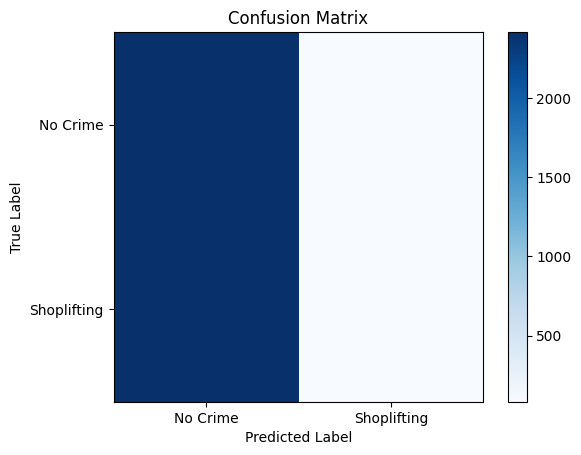

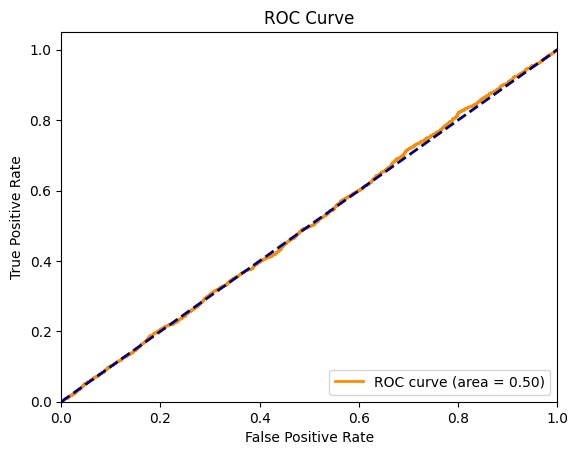

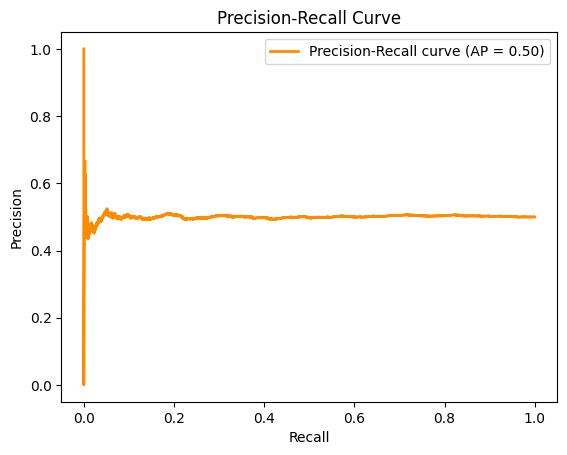

In [ ]:
# Assuming 'test_generator' provides true labels and 'model' outputs probabilities for the test set
y_true = test_generator.classes
y_score = model.predict(test_generator).flatten()  # Assuming binary classification, hence using flatten()

# 1. Confusion Matrix
y_pred = (y_score > 0.5).astype(int)  # Convert probabilities to binary predictions
plot_confusion_matrix(y_true, y_pred)

# 2. ROC Curve
plot_roc_curve(y_true, y_score)

# 3. Precision-Recall Curve
plot_precision_recall_curve(y_true, y_score)

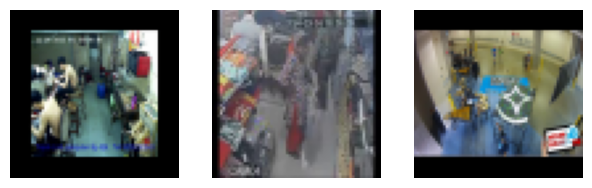

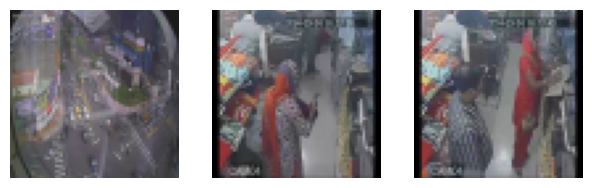

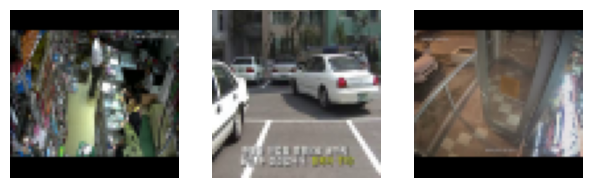

In [ ]:
for i in range(130,133):
    img, label = train_generator[i]
    plt.figure(figsize=(10, 10))
    for j in range(3):
        plt.subplot(1, 4, j+1)
        plt.imshow(img[j])
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 31ms/step


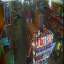

1/1 [==============================] - 0s 43ms/step


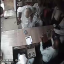

1/1 [==============================] - 0s 36ms/step


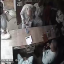

1/1 [==============================] - 0s 29ms/step


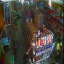

1/1 [==============================] - 0s 30ms/step


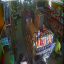

1/1 [==============================] - 0s 28ms/step


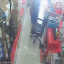

1/1 [==============================] - 0s 30ms/step


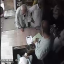

1/1 [==============================] - 0s 35ms/step


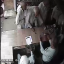

1/1 [==============================] - 0s 28ms/step


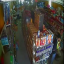

1/1 [==============================] - 0s 29ms/step


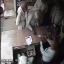

1/1 [==============================] - 0s 30ms/step


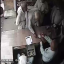

1/1 [==============================] - 0s 30ms/step


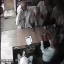

1/1 [==============================] - 0s 31ms/step


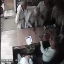

1/1 [==============================] - 0s 27ms/step


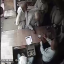

1/1 [==============================] - 0s 29ms/step


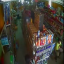

1/1 [==============================] - 0s 30ms/step


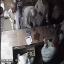

1/1 [==============================] - 0s 30ms/step


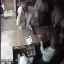

1/1 [==============================] - 0s 38ms/step


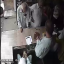

1/1 [==============================] - 0s 29ms/step


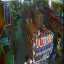

1/1 [==============================] - 0s 28ms/step


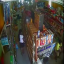

1/1 [==============================] - 0s 32ms/step


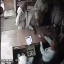

1/1 [==============================] - 0s 30ms/step


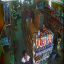

1/1 [==============================] - 0s 31ms/step


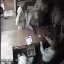

1/1 [==============================] - 0s 30ms/step


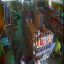

1/1 [==============================] - 0s 28ms/step


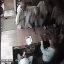

1/1 [==============================] - 0s 27ms/step


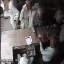

1/1 [==============================] - 0s 30ms/step


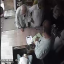

1/1 [==============================] - 0s 36ms/step


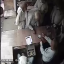

1/1 [==============================] - 0s 34ms/step


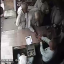

1/1 [==============================] - 0s 27ms/step


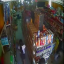

1/1 [==============================] - 0s 30ms/step


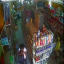

1/1 [==============================] - 0s 36ms/step


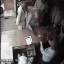

1/1 [==============================] - 0s 29ms/step


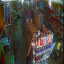

1/1 [==============================] - 0s 31ms/step


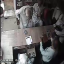

1/1 [==============================] - 0s 31ms/step


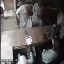

1/1 [==============================] - 0s 29ms/step


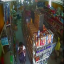

1/1 [==============================] - 0s 31ms/step


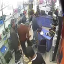

1/1 [==============================] - 0s 32ms/step


In [ ]:
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the trained model
model = load_model('shoplifting_detection_model.h5')

# Function to preprocess frames
def preprocess_frame(frame):
    frame_resized = cv2.resize(frame, (64, 64))
    frame_normalized = frame_resized / 255.0
    return np.expand_dims(frame_normalized, axis=0)

# Function to predict shoplifting for a single video file
def predict_shoplifting(video_path):
    cap = cv2.VideoCapture(video_path)
    predictions = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        preprocessed_frame = preprocess_frame(frame)
        prediction = model.predict(preprocessed_frame)[0][0]
        predictions.append(prediction)

    cap.release()
    return predictions

# Path to the directory containing test files
test_dir = '/content/test_sep/Shoplifting'

# Iterate over all files in the test directory
for filename in os.listdir(test_dir):
    video_path = os.path.join(test_dir, filename)
    predictions = predict_shoplifting(video_path)
    avg_prediction = np.mean(predictions)

    # If prediction is found (you can adjust the threshold)
    if avg_prediction > 0.5:
        # Extract and print the first frame as a thumbnail
        cap = cv2.VideoCapture(video_path)
        ret, frame = cap.read()
        cap.release()
        cv2_imshow(frame)  # Display the thumbnail in Colab

In [ ]:
# have not used this block, do not run this block

NUM_CLASSES = 2
mlp_hyperparams = {
    'pooling': 'average',
    'sizes': (64, 128, 256),
    'activations': ('relu', 'relu', 'relu'),
    'dropouts': (0.3, 0.3, 0.3),
    'num_classes': NUM_CLASSES
}

def mlp_classifier(inputs, hyperparams):
    if hyperparams['pooling'] == 'average':
        x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    else:
        x = inputs

    # hidden layers
    for i in range(len(hyperparams['sizes'])):
        x = tf.keras.layers.Dense(hyperparams['sizes'][i],
                                  activation=hyperparams['activations'][i])(x)
        x = tf.keras.layers.Dropout(hyperparams['dropouts'][i])(x)

    # output layer
    x = tf.keras.layers.Dense(hyperparams['num_classes'],
                              activation="softmax",
                              name="classification")(x)

    return x

In [ ]:
# have not used this block, do not run this block

def evaluate(model, data_generator, model_name=''):
    y_test = []
    preds = []
    for idx, batch in tqdm(enumerate(data_generator)):
        preds.append(model.predict(batch[0], verbose=False))
        y_test.append(batch[1].argmax(1))
        if idx == len(data_generator):
            break

    y_test = np.concatenate(y_test)
    preds = np.concatenate(preds)

    fig, c_ax = plt.subplots(1,1, figsize = (15,8))

    def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        for (idx, c_label) in enumerate(CLASS_LABELS):
            fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
            c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
        return roc_auc_score(y_test, y_pred, average=average)

    roc_auc_score_value = multiclass_roc_auc_score(y_test , preds  , average = "micro")
    print('ROC AUC score:', roc_auc_score_value)
    plt.title(model_name)
    plt.grid(True)
    plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
    plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
    plt.legend(fontsize = 11.5)
    plt.show()
    return y_test, preds, roc_auc_score_value

# **ResNet50**
imagenet-pretrained ResNet50 architecture model as a feature extractor.

In [ ]:
from tensorflow.keras.applications import ResNet50

# Define hyperparameters
resnet50_hyperparams = {
    'input_shape': (64, 64, 3),
    'weights': "imagenet",
     #'classes': 1000,
    'pooling': 'avg',  # 'avg' or 'max'
    'trainable': False,
    'lr': 0.001
}

mlp_hyperparams = {
    'sizes': (64, 128, 256),
    'activations': ('relu', 'relu', 'relu'),
    'dropouts': (0.3, 0.3, 0.3),
    'num_classes': 2  # Update this to match binary output
}

# Define model components
def resnet50_extractor(inputs, params):
    base_model = ResNet50(include_top=False, weights=params['weights'], input_shape=params['input_shape'])
    x = base_model(inputs)
    if params['pooling']:
        x = layers.GlobalAveragePooling2D()(x) if params['pooling'] == 'avg' else layers.GlobalMaxPooling2D()(x)
    return x

def mlp_classifier(inputs, params):
    x = inputs
    for size, activation, dropout in zip(params['sizes'], params['activations'], params['dropouts']):
        x = layers.Dense(size, activation=activation)(x)
        x = layers.Dropout(dropout)(x)
    #output = layers.Dense(params['num_classes'], activation='sigmoid')(x)  # Sigmoid activation for binary classification
    output = layers.Dense(params['num_classes'], activation='softmax')(x)  # Sigmoid activation for binary classification
    return output

# Build the model
inputs = tf.keras.layers.Input(shape=resnet50_hyperparams['input_shape'])
feature_extractor = resnet50_extractor(inputs, resnet50_hyperparams)
flattened_features = layers.Flatten()(feature_extractor)
classification_output = mlp_classifier(flattened_features, mlp_hyperparams)
model = tf.keras.Model(inputs=inputs, outputs=classification_output)
model.layers[1].trainable = resnet50_hyperparams['trainable']
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=resnet50_hyperparams['lr']),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()])

model.summary()

# Assuming you have already defined train_generator and test_generator


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                131136    
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                           

In [ ]:
# Model Training
# Model Training
history = model.fit(train_generator, epochs=8, validation_data=test_generator)

Epoch 1/8
625/625 [==============================] - 123s 197ms/step - loss: 0.6320 - auc_9: 0.7689 - val_loss: 0.6352 - val_auc_9: 0.7682
Epoch 2/8
625/625 [==============================] - 118s 189ms/step - loss: 0.6213 - auc_9: 0.7755 - val_loss: 0.6303 - val_auc_9: 0.7656
Epoch 3/8
625/625 [==============================] - 117s 187ms/step - loss: 0.6098 - auc_9: 0.7795 - val_loss: 0.6219 - val_auc_9: 0.7654
Epoch 4/8
625/625 [==============================] - 119s 190ms/step - loss: 0.6005 - auc_9: 0.7828 - val_loss: 0.6249 - val_auc_9: 0.7649
Epoch 5/8
625/625 [==============================] - 117s 188ms/step - loss: 0.5895 - auc_9: 0.7874 - val_loss: 0.6105 - val_auc_9: 0.7597
Epoch 6/8
625/625 [==============================] - 117s 187ms/step - loss: 0.5790 - auc_9: 0.7946 - val_loss: 0.6080 - val_auc_9: 0.7540
Epoch 7/8
625/625 [==============================] - 116s 185ms/step - loss: 0.5711 - auc_9: 0.7973 - val_loss: 0.6220 - val_auc_9: 0.7515
Epoch 8/8
625/625 [========

In [ ]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

157/157 [==============================] - 24s 152ms/step - loss: 0.6107 - auc_9: 0.7480
Test accuracy: 0.7480230331420898


Since keras_applications is not available directly, you can use tensorflow_addons to access ResNet34. However, it is also possible to build the ResNet34 architecture manually if the pre-trained model is not necessary. Alternatively, you can use a third-party library like timm (PyTorch Image Models) to load ResNet34 weights.



# **ResNet 34**

In [ ]:
# without this we can not perform ResNet34 Model
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
ERROR: Operation cancelled by user


In [ ]:
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
from efficientnet.keras import EfficientNetB0  # Adjust if using different EfficientNet versions

# Define hyperparameters
resnet34_hyperparams = {
    'input_shape': (64, 64, 3),
    'weights': "imagenet",
    'pooling': 'avg',  # 'avg' or 'max'
    'trainable': False,
    'lr': 0.001
}

mlp_hyperparams = {
    'sizes': (64, 128, 256),
    'activations': ('relu', 'relu', 'relu'),
    'dropouts': (0.3, 0.3, 0.3),
    'num_classes': 2  # Update this to match binary output
}

# Define model components
def efficientnet_extractor(inputs, params):
    base_model = EfficientNetB0(include_top=False, weights=params['weights'], input_shape=params['input_shape'])
    x = base_model(inputs)
    if params['pooling']:
        x = layers.GlobalAveragePooling2D()(x) if params['pooling'] == 'avg' else layers.GlobalMaxPooling2D()(x)
    return x

def mlp_classifier(inputs, params):
    x = inputs
    for size, activation, dropout in zip(params['sizes'], params['activations'], params['dropouts']):
        x = layers.Dense(size, activation=activation)(x)
        x = layers.Dropout(dropout)(x)
    #output = layers.Dense(params['num_classes'], activation='sigmoid')(x)  # Sigmoid activation for binary classification
    output = layers.Dense(params['num_classes'], activation='softmax')(x)  # Sigmoid activation for binary classification
    return output

# Build the model
inputs = tf.keras.layers.Input(shape=resnet34_hyperparams['input_shape'])
feature_extractor = efficientnet_extractor(inputs, resnet34_hyperparams)
flattened_features = layers.Flatten()(feature_extractor)
classification_output = mlp_classifier(flattened_features, mlp_hyperparams)
model = tf.keras.Model(inputs=inputs, outputs=classification_output)
for layer in model.layers[1].layers:  # Freeze the EfficientNet layers
    layer.trainable = resnet34_hyperparams['trainable']
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=resnet34_hyperparams['lr']),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()])

model.summary()

# Assuming you have already defined train_generator and test_generator
# Model Training
model.fit(train_generator, epochs=8, validation_data=test_generator)

16804768/16804768 [==============================] - 0s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 efficientnet-b0 (Functiona  (None, 2, 2, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_17 (Dense)            (None, 64)                81984     
                                                            

In [ ]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

157/157 [==============================] - 11s 69ms/step - loss: 0.4386 - auc_10: 0.9030
Test accuracy: 0.9029507040977478


# **MobileNet v2**
MobileNet v2 architecture model pretrained on imagenet as a feature extractor.

In [ ]:
# Define hyperparameters
mobilenetv2_hyperparams = {
    'input_shape': (64, 64, 3),
    'weights': "imagenet",
    'alpha': 1.0,
    'trainable': False,
    'lr': 0.001
}

mlp_hyperparams = {
    'sizes': (64, 128, 256),
    'activations': ('relu', 'relu', 'relu'),
    'dropouts': (0.3, 0.3, 0.3),
    'num_classes': 1  # Binary classification
}

# Define model components
def mobile_netv2_extractor(inputs, hyperparams):
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=hyperparams['input_shape'],
        include_top=False,
        weights=hyperparams["weights"],
        alpha=hyperparams['alpha']
    )
    x = base_model(inputs)
    x = layers.GlobalAveragePooling2D()(x)  # Add pooling to match output shape
    return x

def mlp_classifier(inputs, params):
    x = inputs
    for size, activation, dropout in zip(params['sizes'], params['activations'], params['dropouts']):
        x = layers.Dense(size, activation=activation)(x)
        x = layers.Dropout(dropout)(x)
    #output = layers.Dense(params['num_classes'], activation='sigmoid')(x)  # Sigmoid activation for binary classification
    output = layers.Dense(params['num_classes'], activation='softmax')(x)  # Sigmoid activation for binary classification
    return output

# Build the model
inputs = tf.keras.layers.Input(shape=mobilenetv2_hyperparams['input_shape'])
feature_extractor = mobile_netv2_extractor(inputs, mobilenetv2_hyperparams)
classification_output = mlp_classifier(feature_extractor, mlp_hyperparams)
model = tf.keras.Model(inputs=inputs, outputs=classification_output)
for layer in model.layers[1].layers:  # Freeze the MobileNetV2 layers
    layer.trainable = mobilenetv2_hyperparams['trainable']
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=mobilenetv2_hyperparams['lr']),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()])

model.summary()

# Assuming you have already defined train_generator and test_generator
# Model Training
model.fit(train_generator, epochs=8, validation_data=test_generator)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_25 (Dense)            (None, 64)                81984     
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

157/157 [==============================] - 7s 46ms/step - loss: 0.6495 - auc_12: 0.8169
Test accuracy: 0.8169498443603516


# **VGG-19**
VGG-19 architecture model pretrained on imagenet as a feature extractor.

In [ ]:
# Define hyperparameters
vgg19_hyperparams = {
    'input_shape': (64, 64, 3),
    'weights': "imagenet",
    'pooling': 'avg',
    'trainable': False,  # Typically we fine-tune with trainable=False initially
    'lr': 0.001
}

mlp_hyperparams = {
    'sizes': (256, 512, 1024),
    'activations': ('relu', 'relu', 'relu'),
    'dropouts': (0.3, 0.5, 0.4),
    'num_classes': 2  # Change to 1 for binary classification
}

# Define model components
def vgg19_extractor(inputs, hyperparams):
    base_model = tf.keras.applications.VGG19(
        input_shape=hyperparams['input_shape'],
        include_top=False,
        weights=hyperparams['weights']
    )
    x = base_model(inputs)
    if hyperparams['pooling']:
        x = layers.GlobalAveragePooling2D()(x) if hyperparams['pooling'] == 'avg' else layers.GlobalMaxPooling2D()(x)
    return x

def mlp_classifier(inputs, params):
    x = inputs
    for size, activation, dropout in zip(params['sizes'], params['activations'], params['dropouts']):
        x = layers.Dense(size, activation=activation)(x)
        x = layers.Dropout(dropout)(x)
    #output = layers.Dense(params['num_classes'], activation='sigmoid')(x)  # Sigmoid activation for binary classification
    output = layers.Dense(params['num_classes'], activation='softmax')(x)  # Sigmoid activation for binary classification
    return output

# Build the model
inputs = tf.keras.layers.Input(shape=vgg19_hyperparams['input_shape'])
feature_extractor = vgg19_extractor(inputs, vgg19_hyperparams)
classification_output = mlp_classifier(feature_extractor, mlp_hyperparams)
model = tf.keras.Model(inputs=inputs, outputs=classification_output)
for layer in model.layers[1].layers:  # Freeze the VGG19 layers
    layer.trainable = vgg19_hyperparams['trainable']
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=vgg19_hyperparams['lr']),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC()])

model.summary()


Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 global_average_pooling2d_7  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 512)               131584    
                                                          

In [ ]:
# Model Training
model.fit(train_generator, epochs=8, validation_data=test_generator)

Epoch 1/8
625/625 [==============================] - 375s 597ms/step - loss: 0.6927 - auc_16: 0.5572 - val_loss: 0.6530 - val_auc_16: 0.8267
Epoch 2/8
625/625 [==============================] - 372s 595ms/step - loss: 0.6471 - auc_16: 0.6822 - val_loss: 0.5975 - val_auc_16: 0.8528
Epoch 3/8
625/625 [==============================] - 376s 602ms/step - loss: 0.5924 - auc_16: 0.7767 - val_loss: 0.5534 - val_auc_16: 0.8609
Epoch 4/8
625/625 [==============================] - 370s 592ms/step - loss: 0.5417 - auc_16: 0.8235 - val_loss: 0.5229 - val_auc_16: 0.8685
Epoch 5/8
625/625 [==============================] - 373s 597ms/step - loss: 0.4914 - auc_16: 0.8564 - val_loss: 0.5071 - val_auc_16: 0.8715
Epoch 6/8
625/625 [==============================] - 367s 588ms/step - loss: 0.4491 - auc_16: 0.8800 - val_loss: 0.5134 - val_auc_16: 0.8704
Epoch 7/8
625/625 [==============================] - 374s 598ms/step - loss: 0.4203 - auc_16: 0.8941 - val_loss: 0.5224 - val_auc_16: 0.8673
Epoch 8/8
625

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

157/157 [==============================] - 78s 494ms/step - loss: 0.5410 - auc_16: 0.8643
Test accuracy: 0.8642555475234985


# **Vision Transformer**

In [ ]:
!pip install vit-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.0 MB/s eta 0:00:00


In [ ]:

import tensorflow_addons as tfa  # Import tensorflow_addons
from vit_keras import vit

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define hyperparameters
vit16_hyperparams = {
    'image_size': 64,
    'activation': 'softmax', #sigmoid
    'lr': 0.001,
    'num_classes': 2,  # Binary classification outputs a single value
    'pretrained': True
}

# Define the Vision Transformer extractor
def vit16_extractor(hyperparams):
    feature_extractor = vit.vit_b16(
        image_size=hyperparams['image_size'],
        activation=hyperparams['activation'],
        pretrained=hyperparams['pretrained'],
        include_top=False,  # Exclude the top layer
        pretrained_top=False
    )
    return feature_extractor

# Build the model
inputs = tf.keras.layers.Input(shape=(vit16_hyperparams['image_size'], vit16_hyperparams['image_size'], 3))
feature_extractor = vit16_extractor(vit16_hyperparams)(inputs)
flattened_features = layers.Flatten()(feature_extractor)
classification_output = layers.Dense(1, activation='sigmoid')(flattened_features)  # Single output for binary classification

model = tf.keras.Model(inputs=inputs, outputs=classification_output)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=vit16_hyperparams['lr']),
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=[tf.keras.metrics.AUC()])

model.summary()

# Assuming you have already defined train_generator and test_generator
# Model Training
model.fit(train_generator, epochs=8, validation_data=test_generator)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 vit-b16 (Functional)        (None, 768)               85660416  
                                                                 
 flatten_3 (Flatten)         (None, 768)               0         
                                                                 
 dense_45 (Dense)            (None, 1)                 769       
                                                                 
Total params: 85661185 (326.77 MB)
Trainable params: 85661185 (326.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/8
625/625 [==============================] - 1211s 2s/step - loss: 0.4347 - auc_20: 0.8783 - val_loss: 0.8710 - val_auc_20: 0.6831
Epoch 2

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

157/157 [==============================] - 91s 579ms/step - loss: 1.7967 - auc_20: 0.6870
Test accuracy: 0.6870043873786926


# **Xception**
Xception architecture model pretrained on imagenet as a feature extractor.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train_sep',
    target_size=(71, 71),  # Match input shape of Xception
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    '/content/test_sep',
    target_size=(71, 71),  # Match input shape of Xception
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define hyperparameters
xception_hyperparams = {
    'input_shape': (71, 71, 3),
    'weights': "imagenet",
    'pooling': 'avg',
    'trainable': False,  # Typically we fine-tune with trainable=False initially
    'lr': 0.001
}

mlp_hyperparams = {
    'sizes': (256, 512, 1024),
    'activations': ('relu', 'relu', 'relu'),
    'dropouts': (0.3, 0.5, 0.4),
    'num_classes': 2  # Update this to match binary output
}

# Define Xception feature extractor
def xception_extractor(inputs, hyperparams):
    base_model = Xception(
        input_shape=hyperparams['input_shape'],
        include_top=False,
        weights=hyperparams["weights"],
        pooling=hyperparams["pooling"]
    )
    base_model.trainable = hyperparams['trainable']
    x = base_model(inputs, training=False)
    return x

# Define MLP classifier
def mlp_classifier(inputs, params):
    x = inputs
    for size, activation, dropout in zip(params['sizes'], params['activations'], params['dropouts']):
        x = layers.Dense(size, activation=activation)(x)
        x = layers.Dropout(dropout)(x)
    output = layers.Dense(params['num_classes'], activation='softmax')(x)  # Softmax activation for multi-class classification
    return output

# Build the model
inputs = tf.keras.layers.Input(shape=xception_hyperparams['input_shape'])
feature_extractor = xception_extractor(inputs, xception_hyperparams)
classification_output = mlp_classifier(feature_extractor, mlp_hyperparams)
model = tf.keras.Model(inputs=inputs, outputs=classification_output)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=xception_hyperparams['lr']),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.AUC()])

model.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 71, 71, 3)]       0         
                                                                 
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                              

In [ ]:
# Model Training
model.fit(train_generator, epochs=8, validation_data=test_generator)

Epoch 1/8
625/625 [==============================] - 186s 293ms/step - loss: 0.6347 - auc: 0.6868 - val_loss: 0.6021 - val_auc: 0.8326
Epoch 2/8
625/625 [==============================] - 146s 234ms/step - loss: 0.5141 - auc: 0.8391 - val_loss: 0.5380 - val_auc: 0.8510
Epoch 3/8
625/625 [==============================] - 171s 273ms/step - loss: 0.4263 - auc: 0.8971 - val_loss: 0.4937 - val_auc: 0.8603
Epoch 4/8
625/625 [==============================] - 138s 220ms/step - loss: 0.3733 - auc: 0.9205 - val_loss: 0.4947 - val_auc: 0.8524
Epoch 5/8
625/625 [==============================] - 140s 225ms/step - loss: 0.3338 - auc: 0.9369 - val_loss: 0.4979 - val_auc: 0.8509
Epoch 6/8
625/625 [==============================] - 136s 218ms/step - loss: 0.3042 - auc: 0.9481 - val_loss: 0.5182 - val_auc: 0.8431
Epoch 7/8
625/625 [==============================] - 151s 241ms/step - loss: 0.2813 - auc: 0.9561 - val_loss: 0.5340 - val_auc: 0.8398
Epoch 8/8
625/625 [==============================] - 15

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

157/157 [==============================] - 32s 202ms/step - loss: 0.5699 - auc: 0.8288
Test accuracy: 0.8287661075592041


157/157 [==============================] - 34s 218ms/step


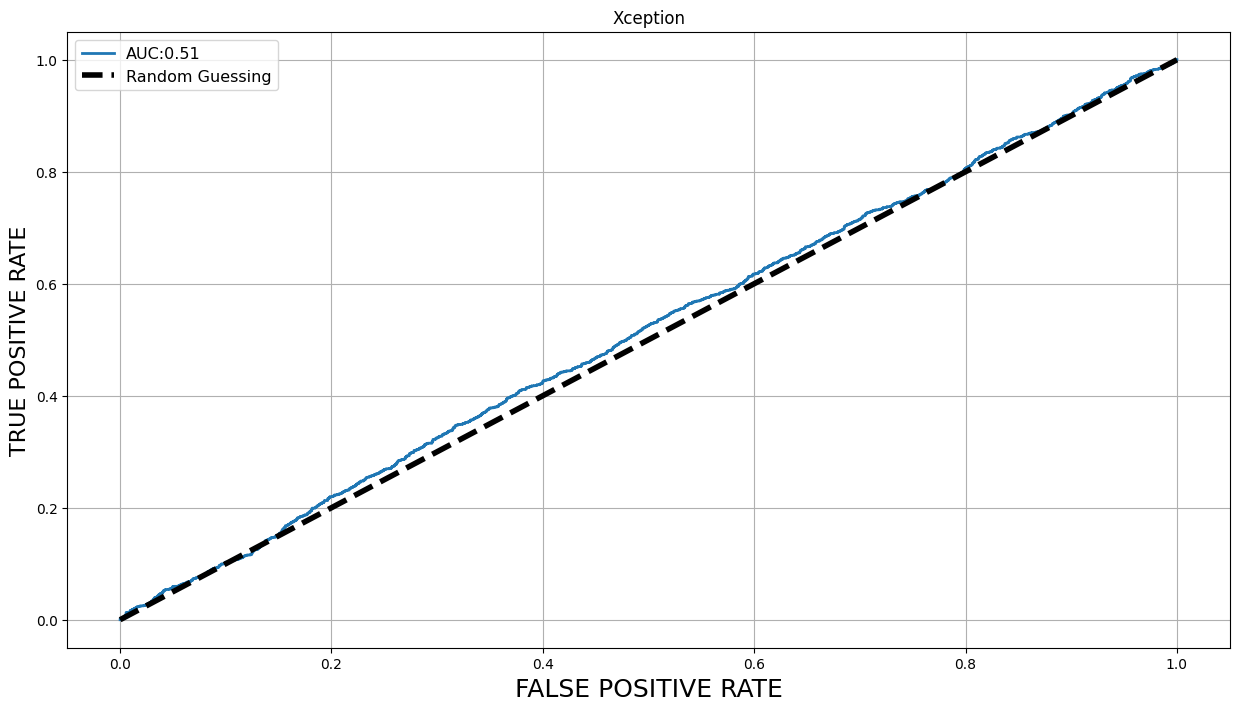

ROC AUC score: 0.51310228


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Define your class labels
CLASS_LABELS = ['Normal', 'Shoplifting']

# Generate predictions
preds = model.predict(test_generator)
y_test = test_generator.classes

# Ensure that y_test is in the correct format
lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)

# If y_test is not one-hot encoded, ensure it is converted correctly for ROC calculation
if y_test.shape[1] == 1:  # In case it is binary but not one-hot encoded
    y_test = np.hstack((1 - y_test, y_test))

# Plotting the ROC curves
fig, c_ax = plt.subplots(1, 1, figsize=(15, 8))

# For binary classification
fpr, tpr, thresholds = roc_curve(y_test[:, 1], preds[:, 1])
c_ax.plot(fpr, tpr, lw=2, label='AUC:%0.2f' % auc(fpr, tpr))

c_ax.plot([0, 1], [0, 1], 'black', linestyle='dashed', lw=4, label='Random Guessing')

plt.title("Xception")
plt.grid(True)
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize=11.5)
plt.show()

# Print ROC AUC score
print('ROC AUC score:', roc_auc_score(y_test, preds))